# Sentiment Analysis

In this notebook we will look at sentiment classification. For this we will use the IMDB dataset. This dataset consists of positive and negative movie reviews of the IMDB website

## Data modeling

The first step would be to collect the necessary data this has already be take care of through the csv file. But since we did not collect the data ourselves we have to make ourselves familiar with the data.

### Visualize, Visualize, Visualize

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
# lets load our data
df_raw = pd.read_csv('IMDB Dataset.csv')

Pandas already gives us a lot of possibilities to investigate our data 

In [3]:
df_raw.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df_raw.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

As we can see the data in the csv file contains 5000 reviews and each of the review has a associated sentiment score of either positive or negative.  
Next we can also count how many samples are positive and negative in our dataset

In [5]:
df_raw['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [6]:
df_raw['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

We can also use NLTK and matplotlib to help with visualization

## Sentiment Analysis using spaCy and textblob 

In [56]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_lg')
nlp.add_pipe('spacytextblob')

In [57]:
df_spacy = df_raw.copy()

In [58]:
%%time
assessments = []
for doc in nlp.pipe(df_spacy["review"]):
    assessments.append(doc._.blob.sentiment_assessments)
    
df_spacy["scores"] = assessments
df_spacy.head()

CPU times: user 9min 56s, sys: 4.64 s, total: 10min 1s
Wall time: 10min


,review,sentiment,scores
0,One of the other reviewers has mentioned that ...,positive,"(0.023433179723502305, 0.4903686635944701, [([..."
1,A wonderful little production. <br /><br />The...,positive,"(0.1097222222222222, 0.5593434343434344, [(['w..."
2,I thought this was a wonderful way to spend ti...,positive,"(0.35400793650793644, 0.6587301587301588, [(['..."
3,Basically there's a family where a little boy ...,negative,"(-0.0578125, 0.45416666666666666, [(['little']..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"(0.2179522497704316, 0.45291551882460973, [(['..."


In [59]:
df_spacy['polarity'] = df_spacy['scores'].apply(lambda x: x.polarity)
df_spacy['subjectivity'] = df_spacy['scores'].apply(lambda x: x.subjectivity)
df_spacy.head()

,review,sentiment,scores,polarity,subjectivity
0,One of the other reviewers has mentioned that ...,positive,"(0.023433179723502305, 0.4903686635944701, [([...",0.023433,0.490369
1,A wonderful little production. <br /><br />The...,positive,"(0.1097222222222222, 0.5593434343434344, [(['w...",0.109722,0.559343
2,I thought this was a wonderful way to spend ti...,positive,"(0.35400793650793644, 0.6587301587301588, [(['...",0.354008,0.658730
3,Basically there's a family where a little boy ...,negative,"(-0.0578125, 0.45416666666666666, [(['little']...",-0.057813,0.454167
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"(0.2179522497704316, 0.45291551882460973, [(['...",0.217952,0.452916


In [60]:
df_spacy = df_spacy[['review', 'sentiment', 'polarity', 'subjectivity', 'scores']]

In [61]:
df_spacy.head()

,review,sentiment,polarity,subjectivity,scores
0,One of the other reviewers has mentioned that ...,positive,0.023433,0.490369,"(0.023433179723502305, 0.4903686635944701, [([..."
1,A wonderful little production. <br /><br />The...,positive,0.109722,0.559343,"(0.1097222222222222, 0.5593434343434344, [(['w..."
2,I thought this was a wonderful way to spend ti...,positive,0.354008,0.658730,"(0.35400793650793644, 0.6587301587301588, [(['..."
3,Basically there's a family where a little boy ...,negative,-0.057813,0.454167,"(-0.0578125, 0.45416666666666666, [(['little']..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.217952,0.452916,"(0.2179522497704316, 0.45291551882460973, [(['..."


### Evaluating how well textblob did on the IMDB dataset

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
df_spacy['comp_score'] = df_spacy['polarity'].apply(lambda score: 'positive' if score >= 0 else 'negative')
df_spacy.head()

,review,sentiment,polarity,subjectivity,scores,comp_score
0,One of the other reviewers has mentioned that ...,positive,0.023433,0.490369,"(0.023433179723502305, 0.4903686635944701, [([...",positive
1,A wonderful little production. <br /><br />The...,positive,0.109722,0.559343,"(0.1097222222222222, 0.5593434343434344, [(['w...",positive
2,I thought this was a wonderful way to spend ti...,positive,0.354008,0.658730,"(0.35400793650793644, 0.6587301587301588, [(['...",positive
3,Basically there's a family where a little boy ...,negative,-0.057813,0.454167,"(-0.0578125, 0.45416666666666666, [(['little']...",negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.217952,0.452916,"(0.2179522497704316, 0.45291551882460973, [(['...",positive


In [64]:
spacy_acc = accuracy_score(df_spacy['sentiment'], df_spacy['comp_score'])
spacy_acc

0.68828

## Sentiment Analysis using nltk and VADER

In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
sid = SentimentIntensityAnalyzer()

In [15]:
df_nltk = df_raw.copy()

In [16]:
%%time
df_nltk['scores'] = df_nltk['review'].apply(lambda review: sid.polarity_scores(review))
df_nltk.head()

CPU times: user 37.8 s, sys: 32 ms, total: 37.9 s
Wall time: 37.9 s


,review,sentiment,scores
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'co..."
1,A wonderful little production. <br /><br />The...,positive,"{'neg': 0.053, 'neu': 0.776, 'pos': 0.172, 'co..."
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.094, 'neu': 0.714, 'pos': 0.192, 'co..."
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'co..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'co..."


In [17]:
df_nltk['compound'] = df_nltk['scores'].apply(lambda d:d['compound'])
df_nltk['comp_score'] = df_nltk['compound'].apply(lambda score: 'positive' if score >= 0 else 'negative')
df_nltk.head()

,review,sentiment,scores,compound,comp_score
0,One of the other reviewers has mentioned that ...,positive,"{'neg': 0.203, 'neu': 0.748, 'pos': 0.048, 'co...",-0.9951,negative
1,A wonderful little production. <br /><br />The...,positive,"{'neg': 0.053, 'neu': 0.776, 'pos': 0.172, 'co...",0.9641,positive
2,I thought this was a wonderful way to spend ti...,positive,"{'neg': 0.094, 'neu': 0.714, 'pos': 0.192, 'co...",0.9605,positive
3,Basically there's a family where a little boy ...,negative,"{'neg': 0.138, 'neu': 0.797, 'pos': 0.065, 'co...",-0.9213,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"{'neg': 0.052, 'neu': 0.801, 'pos': 0.147, 'co...",0.9744,positive


### Evaluating how well VADER did on the IMDB dataset

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
nltk_acc = accuracy_score(df_nltk['sentiment'], df_nltk['comp_score'])
nltk_acc

0.69626

## Sentiment Analysis using scikit learn
In this section we will do a sentiment analysis with the help of scikit learns machine learning algorithms.  
But for this to work we first have to convert the sentiment value into numerical values.  
* Positive -> 1
* Neagative -> 0

In [20]:
df_ml  = df_raw.copy()

In [21]:
df_ml['sentiment'] = df_ml.sentiment.apply(lambda score: 1 if score == 'positive' else 0)
df_ml.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Since we are using supervised learning we have to split our dataset into features X and its labels y.  
The label y is the solution with which the algorithm can learn and improve.

In [22]:
# split dataframe into feature matrix X and label vector y
from sklearn.feature_extraction.text import CountVectorizer

# Creating sparse matrix of top 2500 tokens
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(df_ml.review).toarray()
y = df_ml['sentiment'].values

### The two sets

In Machine learning and supervised training we split our dataset into at least two sets. 

* training set
* test set

The training set is used to train our model. There we give the model a review and the corresponding label and the model trains by producing its own label and compares it to the correct label. If the produced label is different then the real label the model will do some corrections and try again.  
The test set is then used to test the trained model on data it has never seen before. We want to use the model on new data after all and not the data where we already know the answer.  

Because of this we have to split our feature Matrix X and label vector y into train and test set.

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [24]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

/home/msk/Projects/work/sentiment_analysis/.env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = log_model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
ml_acc = accuracy_score(y_test, y_pred)

## Sentiment Analysis using deep learning and neuronal networks 

The process for deep learning is similar to machine learning:
* split the dataset into 3 sets
* select/build a model
* train the model
* evaluate the model

1) The first difference is that we now split the dataset into sets of 3 
    * training set
    * validation set
    * test set  
> The train and test set have the same functionality as before. The validation set is used during training to compare the the model after each training iteration with some data.

2) The next difference is the model/algorithm. In case of DL this is more complex then just choosing a classifier from scikit-learn. We have to stack layers on top of each other through which our text hast to go through (Similar to a spacy pipeline).

3) Additionally we have to prepare our text data to make it fit into these neuronal layers. Since these layers need so called tensors (multidimensional matrices) as an input we have to convert our dataframe into tensors

### Loading and preparing the data

In [27]:
df_dl = df_raw.copy()
# Split the dataframe into feature matrix and label vector
df_dl['sentiment'] = df_dl['sentiment'].apply(lambda score: 1 if score == 'positive' else 0)
X = df_dl.review.values
y = df_dl.sentiment.values

# Splitting the dataset into train, val and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.50, random_state = 0)

In [28]:
import tensorflow as tf

In [29]:
tf.random.set_seed(42)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [30]:
tf.random.set_seed(42)
train_set = train_dataset.shuffle(5000, seed=42).batch(32).prefetch(1)
valid_set = val_dataset.batch(32).prefetch(1)
test_set = test_dataset.batch(32).prefetch(1)

In [31]:
vocab_size = 1000
text_vec_layer = tf.keras.layers.TextVectorization(max_tokens=vocab_size)
text_vec_layer.adapt(train_set.map(lambda reviews, labels:reviews))

### Training the model

In [32]:
# with masking
embed_size = 128
tf.random.set_seed(42)
model_dl = tf.keras.Sequential([
    text_vec_layer,
    tf.keras.layers.Embedding(vocab_size, embed_size, mask_zero=True),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_dl.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model_dl.fit(train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
1250/1250 [==============================] - 37s 27ms/step - loss: 0.4762 - accuracy: 0.7564 - val_loss: 0.3141 - val_accuracy: 0.8684
Epoch 2/10
1250/1250 [==============================] - 21s 17ms/step - loss: 0.2907 - accuracy: 0.8787 - val_loss: 0.3462 - val_accuracy: 0.8590
Epoch 3/10
1250/1250 [==============================] - 21s 17ms/step - loss: 0.2671 - accuracy: 0.8898 - val_loss: 0.3089 - val_accuracy: 0.8684
Epoch 4/10
1250/1250 [==============================] - 22s 17ms/step - loss: 0.2496 - accuracy: 0.8990 - val_loss: 0.3034 - val_accuracy: 0.8762
Epoch 5/10
1250/1250 [==============================] - 21s 17ms/step - loss: 0.2330 - accuracy: 0.9056 - val_loss: 0.2996 - val_accuracy: 0.8798
Epoch 6/10
1250/1250 [==============================] - 21s 17ms/step - loss: 0.2160 - accuracy: 0.9149 - val_loss: 0.3417 - val_accuracy: 0.8720
Epoch 7/10
1250/1250 [==============================] - 21s 17ms/step - loss: 0.1995 - accuracy: 0.9209 - val_loss: 0.3413 -

### Evaluate the model

In [33]:
dl_eval = model_dl.evaluate(test_set)
dl_eval

157/157 [==============================] - 1s 7ms/step - loss: 0.4149 - accuracy: 0.8632


[0.41488534212112427, 0.8632000088691711]

In [34]:
dl_acc  = dl_eval[1]
dl_acc

0.8632000088691711

## Sentiment Analysis using deep learning and pretrained embedding layers

Today you often do not train the embedding layer on your own but use already trained layers. These layers are often available on the different community pages like tensor-hub, hugging-face, pytorch, github,....  

Since we are using tensorflow we will use the universal sentence encoder from tensor-hub

### Data preparation
The data preparation is again the same as before

In [35]:
df_pt = df_raw.copy()
# Split the dataframe into feature matrix and label vector
df_pt['sentiment'] = df_pt['sentiment'].apply(lambda score: 1 if score == 'positive' else 0)
X = df_pt.review.values
y = df_pt.sentiment.values

# Splitting the dataset into train, val and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.50, random_state = 0)

In [36]:
tf.random.set_seed(42)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [37]:
tf.random.set_seed(42)
train_set = train_dataset.shuffle(5000, seed=42).batch(32).prefetch(tf.data.AUTOTUNE)
valid_set = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_set = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [38]:
vocab_size = 1000
text_vec_layer = tf.keras.layers.TextVectorization(max_tokens=vocab_size)
text_vec_layer.adapt(train_set.map(lambda reviews, labels:reviews))

### Training the model

In [40]:
import os
import tensorflow_hub as hub

os.environ["TFHUB_CACHE_DIR"] = "my_tfhub_cache"
tf.random.set_seed(42)  

model_pt = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                   trainable=True, dtype=tf.string, input_shape=[]),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_pt.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
model_pt.fit(train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
1250/1250 [==============================] - 469s 364ms/step - loss: 0.2600 - accuracy: 0.8923 - val_loss: 0.2285 - val_accuracy: 0.9072
Epoch 2/10
1250/1250 [==============================] - 94s 75ms/step - loss: 0.0196 - accuracy: 0.9948 - val_loss: 0.4655 - val_accuracy: 0.8778
Epoch 3/10
1250/1250 [==============================] - 75s 60ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.3952 - val_accuracy: 0.9048
Epoch 4/10
1250/1250 [==============================] - 69s 56ms/step - loss: 3.3239e-04 - accuracy: 1.0000 - val_loss: 0.4559 - val_accuracy: 0.9068
Epoch 5/10
1250/1250 [==============================] - 65s 52ms/step - loss: 2.5222e-04 - accuracy: 1.0000 - val_loss: 0.5088 - val_accuracy: 0.9044
Epoch 6/10
1250/1250 [==============================] - 56s 45ms/step - loss: 8.2105e-04 - accuracy: 0.9997 - val_loss: 0.6541 - val_accuracy: 0.9014
Epoch 7/10
1250/1250 [==============================] - 52s 42ms/step - loss: 0.0025 - accuracy: 0.9992 - val_

In [41]:
pt_eval = model_pt.evaluate(test_set)
pt_eval

157/157 [==============================] - 2s 11ms/step - loss: 0.7630 - accuracy: 0.9012


[0.7630078792572021, 0.901199996471405]

In [42]:
pt_acc = pt_eval[1]
pt_acc

0.901199996471405

## Evaluation

In reality you build a model, train it evaluate it, improve it, train it, evaluate it and so on and so on.  
There are a lot of angles that can be attacked:
* Get more data
* Preprocess data better
* Tune hyperparameters of the ML and DL networks
* Find and use a better embedding technique or layer  

This is usually a long and iterative process. But we will end this introduction by comparing the accuracy results of our different approaches 

In [65]:
accuracy_values = [spacy_acc, nltk_acc, ml_acc, dl_acc, pt_acc]
#accuracy_values = [spacy_acc, nltk_acc]
methods = ['spacy', 'vader', 'ml', 'dl', 'pretrained-dl']
accuracy_df = pd.DataFrame(zip(methods, accuracy_values), columns=['Methods','Accuracy'])
accuracy_df

,Methods,Accuracy
0,spacy,0.68828
1,vader,0.69626
2,ml,0.87880
3,dl,0.86320
4,pretrained-dl,0.90120


<Axes: >

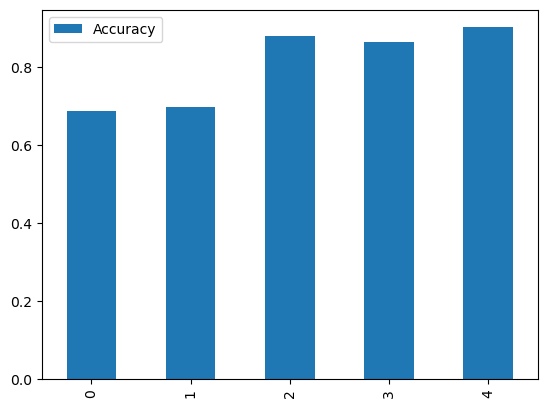

In [66]:
accuracy_df.plot.bar()

## Use the dl model to make predictions on new text

In [44]:
text_as_tensor = tf.convert_to_tensor("The movie was great. It was the best movie I have seen in my live")

In [45]:
prediction = model_pt.predict(tf.expand_dims(text_as_tensor, axis=0))
prediction

1/1 [==============================] - 0s 149ms/step


array([[0.9999962]], dtype=float32)

In [46]:
result = tf.round(prediction)
result

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

### Lets test a few review

In [47]:
examples = ["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",
           "A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only has got all the polari but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",
           "I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her sexy image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than Devil Wears Prada and more interesting than Superman a great comedy to go see with friends.",
           "Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.",
           "Petter Mattei's Love in the Time of Money is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we encounter.<br /><br />The acting is good under Mr. Mattei's direction. Steve Buscemi, Rosario Dawson, Carol Kane, Michael Imperioli, Adrian Grenier, and the rest of the talented cast, make these characters come alive.<br /><br />We wish Mr. Mattei good luck and await anxiously for his next work."]

In [48]:
text_as_tensor = tf.convert_to_tensor(examples)

In [49]:
prediction = model_pt.predict(text_as_tensor)
prediction

1/1 [==============================] - 0s 13ms/step


array([[9.9999535e-01],
       [9.9999607e-01],
       [9.9999619e-01],
       [2.8069958e-06],
       [9.9999654e-01]], dtype=float32)

In [50]:
result = tf.round(prediction)
result

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

In [51]:
df_raw.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### Lets try again but this time lets preprocess the examples

In [52]:
# Remove punctuation with the help of regex
df_examples = pd.DataFrame(examples, columns=['review'])
df_examples['review'] = df_examples['review'].str.replace("[^^a-zA-Z#]", " ")


# Replace short words like br
df_examples['review'] = df_examples['review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))


# make text lowercase
df_examples['review'] = [review.lower() for review in df_examples['review']]
df_examples.head()


stop_words = nlp.Defaults.stop_words
new_sw_words = ['movie','film','one','make','even']
for word in new_sw_words:
    stop_words.add(word)
    
def remove_sw(review):
    words = [word for word in review.split() if not word in stop_words]
    return " ".join(words)

# Now we can use the function to remove all stopwords from our dataset
df_examples['review'] = df_examples['review'].apply(lambda review: remove_sw(review))


lemma_text_list = []
for doc in nlp.pipe(df_examples["review"]):
    lemma_text_list.append(" ".join(token.lemma_ for token in doc))
df_examples["review"] = lemma_text_list
df_examples.head()

/tmp/ipykernel_321225/3594588132.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_examples['review'] = df_examples['review'].str.replace("[^^a-zA-Z#]", " ")


,review
0,reviewer mention watch episode hook right exac...
1,wonderful little production filming technique ...
2,think wonderful way spend time hot summer week...
3,basically family little boy jake think zombie ...
4,petter mattei love time money visually stunnin...


In [53]:
example_tensors = tf.convert_to_tensor(tf.squeeze(df_examples, axis=1))
prediction = model_pt.predict(example_tensors)
prediction

1/1 [==============================] - 0s 11ms/step


array([[9.9982589e-01],
       [9.9999607e-01],
       [9.9998760e-01],
       [4.5636320e-06],
       [9.9999499e-01]], dtype=float32)

In [54]:
result = tf.round(prediction)
result

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

In [55]:
df_raw.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
